# Figure 5 - Model validation

Create the figure panels describing the SONIC model validation against the detailed NICE model by comparison of charge density profiles for regular-spiking and low-threshold spiking neurons across the LIFUS parameter space and for various sonophore radii.

### Matplotlib parameters

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'arial'

### Imports

In [2]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
from PySONIC.core import NeuronalBilayerSonophore
from PySONIC.utils import logger, si_format
from PySONIC.neurons import getPointNeuron
from PySONIC.plt import CompTimeSeries
from utils import saveFigsAsPDF, cm2inch, getSpikingMetrics, plotSpikingMetrics

Set high logging level to avoid extra logging

In [3]:
logger.setLevel(logging.ERROR)

### Input directory

Indicate here the directory that contains the NICE and SONIC simulation files (*comparisons* sub-folder)

In [4]:
inputdir = input('Select input directory: ')

Select input directory:  C:\Users\lemaire\Documents\SONIC paper data new\comparisons


### Plot parameters

In [32]:
figindex = 5
fs = 15
lw = 2
ps = 8
Qtrace_figsize = cm2inch(25, 12)
metrics_figsize = cm2inch(14.5, 11.6)
figs = {}

### Simulation parameters

In [7]:
a = 32e-9  # m
Adrive = 100e3  # Pa
Fdrive = 500e3  # Hz
tstim = 150e-3  # s
toffset = 100e-3  # s
PRF = 100  # Hz
DC = 1.0
cov = 1.

## Panel A: comparison across US amplitudes (CW, RS neuron)

In [8]:
pneuron = getPointNeuron('RS')
nbls = NeuronalBilayerSonophore(a, pneuron)

Comparison of $Q_m$ traces for CW stimuli at sub-threshold, threshold and supra-threshold amplitudes. **The rendering may take a few seconds...**

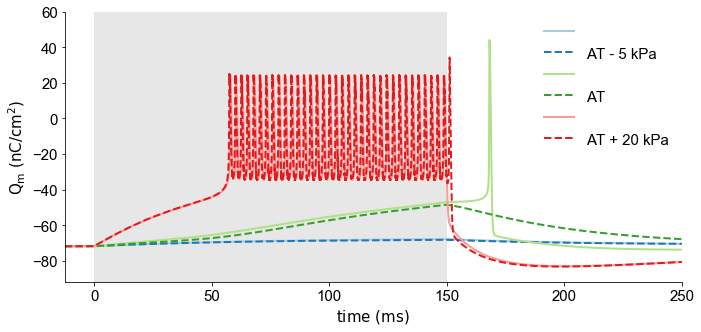

In [23]:
Athr = nbls.titrate(Fdrive, tstim, toffset)
regime_amps = {'AT - 5 kPa': Athr - 5e3, 'AT': Athr, 'AT + 20 kPa': Athr + 20e3}
fnames = []
for x in regime_amps.values():
    for method in ['sonic', 'full']:
        fnames.append(f'{nbls.filecode(Fdrive, x, tstim, toffset, PRF, DC, cov, method)}.pkl')
fpaths = [os.path.join(inputdir, fname) for fname in fnames]
fig = CompTimeSeries(fpaths, 'Qm').render(
    labels=sum([['', x] for x in regime_amps.keys()], []),
    lines=['-', '--'] * len(regime_amps),
    colors=plt.get_cmap('Paired').colors[:2 * len(regime_amps)],
    fs=fs, patches='one', figsize=Qtrace_figsize)
figs['a_Qtraces'] = fig

Comparison of spiking metrics for CW stimuli at various supra-threshold amplitudes. **The rendering may take a few seconds...**

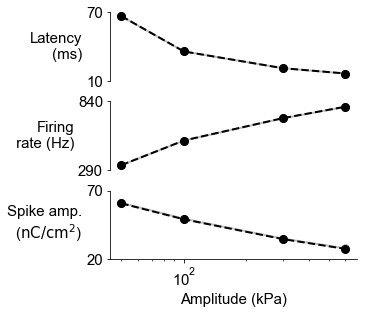

In [33]:
xlabel = 'Amplitude (kPa)'
suprathr_amps = np.array([50, 100, 300, 600]) * 1e3  # Pa
fnames = {'full': [], 'sonic': []}
for x in suprathr_amps:
    for method in ['sonic', 'full']:
        fnames[method].append(f'{nbls.filecode(Fdrive, x, tstim, toffset, PRF, DC, cov, method)}.pkl')
data_fpaths = {k: [os.path.join(inputdir, fname) for fname in v] for k, v in fnames.items()}
metrics_files = {x: '{}_spikemetrics_vs_amplitude_{}.csv'.format(pneuron.name, x) for x in ['full', 'sonic']}
metrics_fpaths = {k: os.path.join(inputdir, v) for k, v in metrics_files.items()}
metrics = {k: getSpikingMetrics(suprathr_amps * 1e-3, xlabel, data_fpaths[k], v) for k, v in metrics_fpaths.items()}
fig = plotSpikingMetrics(suprathr_amps * 1e-3, xlabel, {pneuron.name: metrics}, logscale=True, fs=fs, ps=ps, figsize=metrics_figsize)
figs['a_spikemetrics'] = fig

## Panel B: comparison across US frequencies

In [35]:
pneuron = getPointNeuron('RS')
nbls = NeuronalBilayerSonophore(a, pneuron)
freqs = np.array([20e3, 100e3, 500e3, 1e6, 2e6, 3e6, 4e6])  # Hz

Comparison of $Q_m$ traces for supra-threshold CW stimuli at low and high US frequencies. **The rendering may take a few seconds...**

C:\Users\lemaire\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


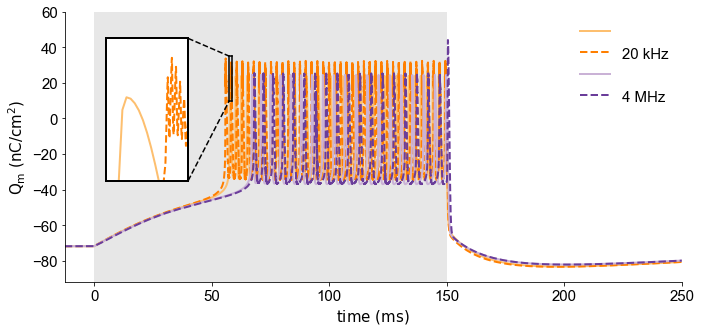

In [36]:
fnames = []
freqs_traces = [freqs.min(), freqs.max()]
for x in freqs_traces:
    A = nbls.titrate(x, tstim, toffset) + 20e3  # Pa
    for method in ['sonic', 'full']:
        fnames.append(f'{nbls.filecode(x, A, tstim, toffset, PRF, DC, cov, method)}.pkl')
fpaths = [os.path.join(inputdir, fname) for fname in fnames]
fig = CompTimeSeries(fpaths, 'Qm').render(
    labels=sum([['', '{}Hz'.format(si_format(f))] for f in freqs_traces], []),
    lines=['-', '--'] * len(freqs_traces), colors=plt.get_cmap('Paired').colors[6:10],
    fs=fs, patches='one', figsize=Qtrace_figsize,
    inset={'xcoords': [5, 40], 'ycoords': [-35, 45], 'xlims': [57.5, 58.5], 'ylims': [10, 35]})
figs['b_Qtraces'] = fig

Comparison of spiking metrics for CW stimuli for supra-threshold amplitudes at various frequencies. **The rendering may take a few seconds...**

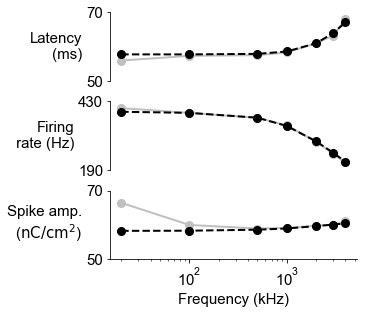

In [37]:
xlabel = 'Frequency (kHz)'
fnames = {'full': [], 'sonic': []}
for x in freqs:
    A = nbls.titrate(x, tstim, toffset) + 20e3  # Pa
    for method in ['sonic', 'full']:
        fnames[method].append(f'{nbls.filecode(x, A, tstim, toffset, PRF, DC, cov, method)}.pkl')
data_fpaths = {k: [os.path.join(inputdir, fname) for fname in v] for k, v in fnames.items()}
metrics_files = {x: '{}_spikemetrics_vs_frequency_{}.csv'.format(pneuron.name, x) for x in ['full', 'sonic']}
metrics_fpaths = {k: os.path.join(inputdir, v) for k, v in metrics_files.items()}
metrics = {k: getSpikingMetrics(freqs * 1e-3, xlabel, data_fpaths[k], v) for k, v in metrics_fpaths.items()}
fig = plotSpikingMetrics(freqs * 1e-3, xlabel, {pneuron.name: metrics}, logscale=True, fs=fs, ps=ps, figsize=metrics_figsize)
figs['b_spikemetrics'] = fig

## Panel C: comparison across sonophore radii

In [39]:
pneuron = getPointNeuron('RS')
nbls = NeuronalBilayerSonophore(a, pneuron)
radii = np.array([16, 22.6, 32, 45.3, 64]) * 1e-9  # m

Comparison of $Q_m$ traces for supra-threshold CW stimuli with small and large sonophore radii. **The rendering may take a few seconds...**

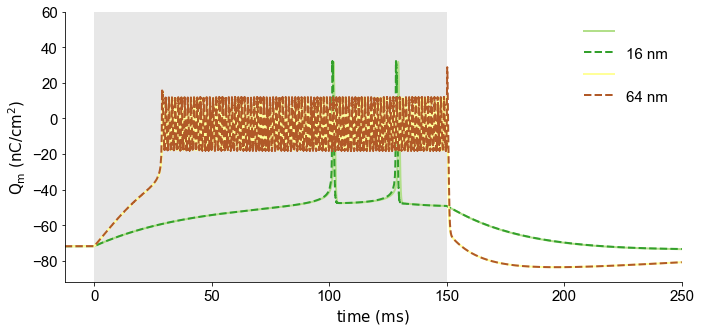

In [40]:
radii_traces = [radii.min(), radii.max()]
fnames = []
for x in radii_traces:
    nbls = NeuronalBilayerSonophore(x, pneuron)
    A = nbls.titrate(Fdrive, tstim, toffset) + 20e3  # Pa
    for method in ['sonic', 'full']:        
        fnames.append(f'{nbls.filecode(Fdrive, A, tstim, toffset, PRF, DC, cov, method)}.pkl')
fpaths = [os.path.join(inputdir, fname) for fname in fnames]
colors = plt.get_cmap('Paired').colors
colors = colors[2:4] + colors[10:12]
fig = CompTimeSeries(fpaths, 'Qm').render(
    labels=sum([['', '{:.0f} nm'.format(x * 1e9)] for x in radii_traces], []),
    lines=['-', '--'] * len(radii_traces), colors=colors,
    fs=fs, patches='one', figsize=Qtrace_figsize)
figs['c_Qtraces'] = fig

Comparison of spiking metrics for CW stimuli for supra-threshold amplitudes for various sonophore radii. **The rendering may take a few seconds...**

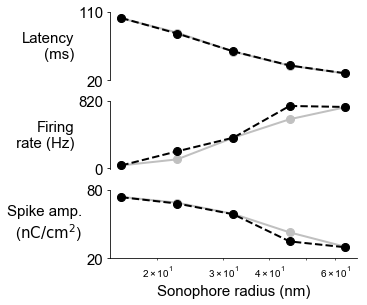

In [41]:
xlabel = 'Sonophore radius (nm)'
fnames = {'full': [], 'sonic': []}
for x in radii:
    nbls = NeuronalBilayerSonophore(x, pneuron)
    A = nbls.titrate(Fdrive, tstim, toffset) + 20e3  # Pa
    for method in ['sonic', 'full']:
        fnames[method].append(f'{nbls.filecode(Fdrive, A, tstim, toffset, PRF, DC, cov, method)}.pkl')
data_fpaths = {k: [os.path.join(inputdir, fname) for fname in v] for k, v in fnames.items()}
metrics_files = {x: '{}_spikemetrics_vs_radius_{}.csv'.format(pneuron.name, x) for x in ['full', 'sonic']}
metrics_fpaths = {k: os.path.join(inputdir, v) for k, v in metrics_files.items()}
metrics = {k: getSpikingMetrics(radii * 1e9, xlabel, data_fpaths[k], v) for k, v in metrics_fpaths.items()}
fig = plotSpikingMetrics(radii * 1e9, xlabel, {pneuron.name: metrics}, logscale=True, fs=fs, ps=ps, figsize=metrics_figsize)
figs['c_spikemetrics'] = fig

## Panel D: comparison across duty cycles

In [42]:
neurons = ['RS', 'LTS']
colors = list(plt.get_cmap('Paired').colors[:6])
del colors[2:4]
DCs = np.array([5, 10, 25, 50, 75, 100]) * 1e-2

Comparison of $Q_m$ traces at for RS and LTS neurons at 100 kPa, 5% duty cycle. **The rendering may take a few seconds...**

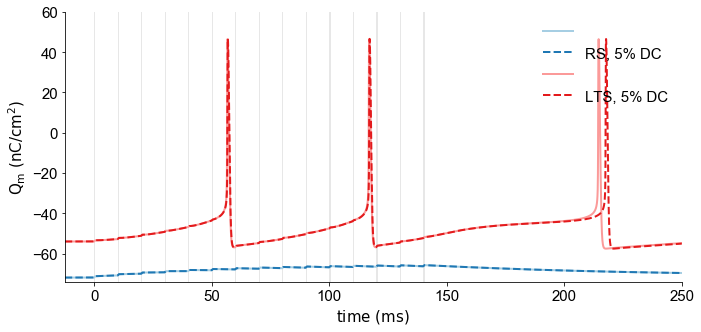

In [43]:
DC_short = DCs.min()
fnames = []
for neuron in neurons:
    pneuron = getPointNeuron(neuron)
    nbls = NeuronalBilayerSonophore(a, pneuron)
    for method in ['sonic', 'full']:        
        fnames.append(f'{nbls.filecode(Fdrive, Adrive, tstim, toffset, PRF, DC_short, cov, method)}.pkl')
fpaths = [os.path.join(inputdir, fname) for fname in fnames]
fig = CompTimeSeries(fpaths, 'Qm').render(
    labels=sum([['', '{}, {:.0f}% DC'.format(x, DC_short * 1e2)] for x in neurons], []),
    lines=['-', '--'] * len(neurons), colors=colors,
    fs=fs, patches='one', figsize=Qtrace_figsize)
figs['d_Qtraces'] = fig

Comparison of spiking metrics for PW stimuli at various duty cycles for RS and LTS neurons. **The rendering may take a few seconds...**

No handles with labels found to put in legend.


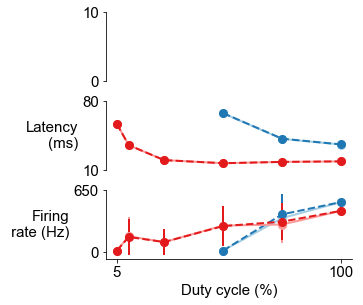

In [45]:
xlabel = 'Duty cycle (%)'
metrics_dict = {} 
colors_dict = {}
for i, neuron in enumerate(neurons):
    fnames = {'full': [], 'sonic': []}
    pneuron = getPointNeuron(neuron)
    nbls = NeuronalBilayerSonophore(a, pneuron)
    for x in DCs:
        for method in ['sonic', 'full']:
            fnames[method].append(f'{nbls.filecode(Fdrive, Adrive, tstim, toffset, PRF, x, cov, method)}.pkl')
    data_fpaths = {k: [os.path.join(inputdir, fname) for fname in v] for k, v in fnames.items()}
    metrics_files = {x: '{}_spikemetrics_vs_DC_{}.csv'.format(neuron, x) for x in ['full', 'sonic']}
    metrics_fpaths = {k: os.path.join(inputdir, v) for k, v in metrics_files.items()}
    metrics_dict[neuron] = {k: getSpikingMetrics(DCs * 1e2, xlabel, data_fpaths[k], v) for k, v in metrics_fpaths.items()}
    colors_dict[neuron] = {'full': colors[2 * i], 'sonic': colors[2 * i + 1]}
fig = plotSpikingMetrics(DCs * 1e2, xlabel, metrics_dict, spikeamp=False, colors=colors_dict, fs=fs, ps=ps, figsize=metrics_figsize)
figs['d_spikemetrics'] = fig

## Panel E: comparison across pulse repetition frequencies

In [ ]:
pneuron = getPointNeuron('LTS')
nbls = NeuronalBilayerSonophore(a, pneuron)

Comparison of $Q_m$ traces for PW stimuli at 5% duty cycle with different pulse repetition frequencies. **The rendering may take a few seconds...**

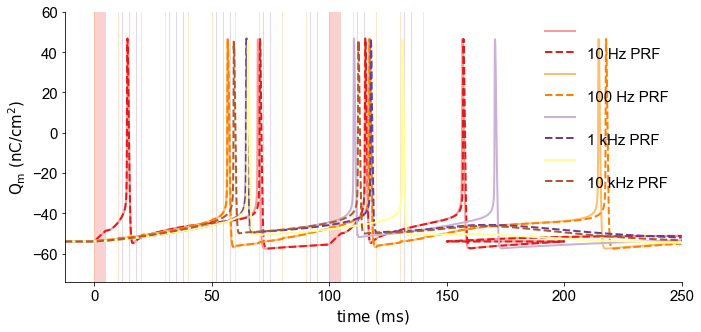

In [46]:
PRFs_traces = np.array([1e1, 1e2, 1e3, 1e4])  # Hz
fnames = []
for x in PRFs_traces:
    for method in ['sonic', 'full']:        
        fnames.append(f'{nbls.filecode(Fdrive, Adrive, tstim, toffset, x, DC_short, cov, method)}.pkl')
fpaths = [os.path.join(inputdir, fname) for fname in fnames]
patches = [False, True] * len(PRFs_traces)
patches[-1] = False
fig = CompTimeSeries(fpaths, 'Qm').render(
    labels=sum([['', '{}Hz PRF'.format(si_format(x, space=' '))] for x in PRFs_traces], []),
    lines=['-', '--'] * len(PRFs_traces), colors=plt.get_cmap('Paired').colors[4:12], 
    fs=fs, patches=patches, figsize=Qtrace_figsize)
figs['e_Qtraces'] = fig

Comparison of spiking metrics for PW stimuli at 5% duty cycle with different pulse repetition frequencies. **The rendering may take a few seconds...**

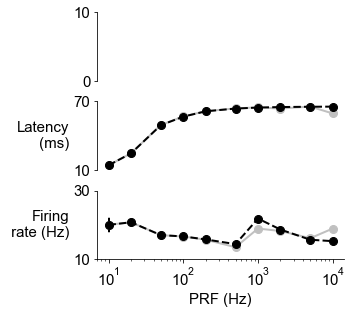

In [47]:
PRFs_dense = sum([[x, 2 * x, 5 * x] for x in PRFs_traces[:-1]], []) + [PRFs_traces[-1]]  # Hz
xlabel = 'PRF (Hz)'
fnames = {'full': [], 'sonic': []}
for x in PRFs_dense:
    for method in ['sonic', 'full']:
        fnames[method].append(f'{nbls.filecode(Fdrive, Adrive, tstim, toffset, x, DC_short, cov, method)}.pkl')
data_fpaths = {k: [os.path.join(inputdir, fname) for fname in v] for k, v in fnames.items()}
metrics_files = {x: '{}_spikemetrics_vs_PRF_{}.csv'.format(pneuron.name, x) for x in ['full', 'sonic']}
metrics_fpaths = {k: os.path.join(inputdir, v) for k, v in metrics_files.items()}
metrics = {k: getSpikingMetrics(PRFs_dense, xlabel, data_fpaths[k], v) for k, v in metrics_fpaths.items()}
fig = plotSpikingMetrics(PRFs_dense, xlabel, {pneuron.name: metrics}, spikeamp=False, logscale=True, fs=fs, ps=ps, figsize=metrics_figsize)
figs['e_spikemetrics'] = fig

### Save figure panels

Save figure panels as **pdf** in the *figs* sub-folder:

In [48]:
saveFigsAsPDF(figs, figindex)